# Maxus file

Take a larger DEM that has a 1000 meter buffer, run `gen_maxus` and crop the resulting to the current topo.

Took the `maxus_30window.nc`, copied it and modified it to `maxus_30cropped.nc`. This notebook will open the big maxus domain and write the cropped data to `maxus_30cropped.nc`.

In [5]:
import xarray as xr

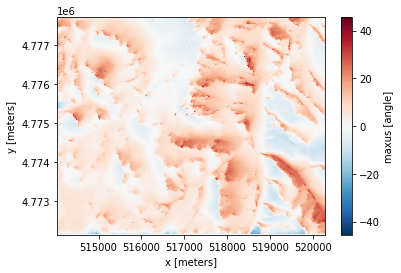

In [9]:
topo = xr.open_dataset('../topo/topo.nc')

# the large domain maxus file
# maxus_big = xr.open_dataset('../topo/maxus_big_30window.nc')
maxus_big = xr.open_dataset('../topo/maxus_big_30window.nc')
tbreak_big = xr.open_dataset('../topo/tbreak_big_30window.nc')

# the maxus file that matches the topo extents
# outfile = '../topo/{}_300_30cropped.nc'
outfile = '../topo/{}_600_30cropped.nc'
maxus_topo = xr.load_dataset(outfile.format('maxus'))
tbreak_topo = xr.load_dataset(outfile.format('tbreak'))

maxus_big.maxus.isel(Direction=45).plot()
# tbreak_big.tbreak.isel(Direction=45).plot()

In [10]:
# mask the maxus_big with the topo
mask = (topo.x == maxus_big.x) & (topo.y == maxus_big.y)

cropped_maxus = maxus_big.where(mask, drop=True)
cropped_tbreak = tbreak_big.where(mask, drop=True)

assert cropped_maxus.maxus.shape == maxus_topo.maxus.shape
assert cropped_tbreak.tbreak.shape == tbreak_topo.tbreak.shape

cropped_maxus

<xarray.Dataset>
Dimensions:    (Direction: 72, x: 225, y: 157)
Coordinates:
  * x          (x) float64 5.16e+05 5.16e+05 5.160e+05 ... 5.183e+05 5.183e+05
  * y          (y) float64 4.776e+06 4.776e+06 4.776e+06 ... 4.774e+06 4.774e+06
Dimensions without coordinates: Direction
Data variables:
    direction  (Direction, x, y) float64 0.0 0.0 0.0 0.0 ... 355.0 355.0 355.0
    maxus      (Direction, y, x) float32 0.8562017 1.0758779 ... 1.5249945
Attributes:
    dateCreated:  2020-12-01T22:07:12.615761

In [11]:
# add the cropped maxus data to the maxus_topo and write
maxus_topo['maxus'] = cropped_maxus.maxus
maxus_topo.to_netcdf(outfile.format('maxus'), format='NETCDF4')

tbreak_topo['tbreak'] = cropped_tbreak.tbreak
tbreak_topo.to_netcdf(outfile.format('tbreak'), format='NETCDF4')